In [36]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import datetime as dt
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
df_allmatch = pd.read_csv("./match_data_yearly/all_years.csv")
df_allmatch["Date"] = pd.to_datetime(df_allmatch["Date"])

In [3]:
df_allmatch

,ID,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeElo,AwayElo,HomeED,AwayED
0,6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916,1500,1500,0,0
1,6012807,2006,1,2006-03-05,ventforet-kofu,shimizu-s-pulse,28,7,0,2,2,小瀬,14277,1500,1500,0,0
2,6012231,2006,1,2006-03-05,fc-tokyo,oita-trinita,22,31,2,0,1,味スタ,22531,1500,1500,0,0
3,6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564,1500,1500,0,0
4,6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199,1500,1500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585,20340120,2020,34,2020-12-19,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251,1594,1560,4,-6
4586,20340810,2020,34,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825,1515,1524,9,-13
4587,20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1453,1458,17,7
4588,20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,味スタ,14373,1540,1453,8,0


In [4]:
df_recent_stats = pd.read_csv("./recent_stats.csv", index_col=0)
df_recent_stats

,HomeShots,HomeShotsOnTarget,HomeShotsFromPK,HomePasses,HomeCrosses,HomeDirectFK,HomeIndirectFK,HomeCK,HomeThrowin,HomeDribbling,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
10011354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10011229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10012205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10011007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10012178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,20.0,6.8,0.0,494.8,17.8,11.8,2.0,6.8,23.4,12.2,...,24.2,1.8,1.8,0.4,0.0,34.4,13.2,113.4,11.58,45.78
20340810,12.2,4.0,0.2,537.2,11.6,14.2,1.0,3.6,21.8,14.2,...,21.8,1.8,3.0,1.0,0.2,50.4,14.2,127.2,11.30,52.58
20343331,13.0,4.4,0.0,598.6,16.2,9.6,3.2,2.6,17.8,11.4,...,22.0,3.0,1.8,1.8,0.0,37.2,9.6,115.0,8.36,55.64
20342218,9.0,4.4,0.0,379.8,8.4,13.8,1.2,3.6,18.8,11.4,...,19.4,2.4,1.2,0.8,0.0,52.4,11.2,107.8,12.16,59.62


In [5]:
df_recent_stats.fillna({'HomeShots':10, 'HomeShotsOnTarget':3, 'HomeShotsFromPK':0.2, 'HomePasses':400,
                        'HomeCrosses':16, 'HomeDirectFK':10, 'HomeIndirectFK':2, 'HomeCK':4,
                        'HomeThrowin':20, 'HomeDribbling':10, 'HomeTackles':18, 'HomeClearances':23,
                        'HomeIntercepts':2, 'HomeOffsides':1.5, 'HomeYellowCards':1, 'HomeRedCards':0,
                        'Home30mLineEntries':33, 'HomePenaltyAreaEntries':9, 'HomeAttacks':117,
                        'HomeChanceBuildingRate':10, 'HomePossession':44,
                        'AwayShots':10, 'AwayShotsOnTarget':3, 'AwayShotsFromPK':0.2, 'AwayPasses':400,
                        'AwayCrosses':16, 'AwayDirectFK':10, 'AwayIndirectFK':2, 'AwayCK':4,
                        'AwayThrowin':20, 'AwayDribbling':10, 'AwayTackles':18, 'AwayClearances':23,
                        'AwayIntercepts':2, 'AwayOffsides':1.5, 'AwayYellowCards':1, 'AwayRedCards':0,
                        'Away30mLineEntries':33, 'AwayPenaltyAreaEntries':9, 'AwayAttacks':117,
                        'AwayChanceBuildingRate':10, 'AwayPossession':44}, inplace=True)

In [6]:
df_recent_stats.sort_index(inplace=True)

df_allmatch.set_index("ID",inplace=True)
df_allmatch.sort_index(inplace=True)

In [10]:
df = pd.concat([df_allmatch, df_recent_stats], axis=1)
df = df.set_index("Date")
df.sort_index(inplace=True)
df

,Year,Sec,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-04,2006,1,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,yokohama-fa-marinos,kyoto-sanga,5,24,4,1,1,日産ス,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,sanfrecce-hiroshima,kashima-antlers,10,1,3,4,2,広島ビ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19,2020,34,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,...,21.8,1.8,3.0,1.0,0.2,50.4,14.2,127.2,11.30,52.58
2020-12-19,2020,34,urawa-red-diamonds,consadole-sapporo,3,14,0,2,2,埼玉,...,18.8,1.6,1.8,1.0,0.0,46.4,13.8,123.8,11.02,53.80
2020-12-19,2020,34,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,...,24.2,1.8,1.8,0.4,0.0,34.4,13.2,113.4,11.58,45.78


In [12]:
df.insert(8,"GoalDiff",df["HomeGF"]-df["AwayGF"])

In [13]:
df

,Year,Sec,Home,Away,HomeID,AwayID,HomeGF,AwayGF,GoalDiff,W/L,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-04,2006,1,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,yokohama-fa-marinos,kyoto-sanga,5,24,4,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,sanfrecce-hiroshima,kashima-antlers,10,1,3,4,-1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19,2020,34,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,1,...,21.8,1.8,3.0,1.0,0.2,50.4,14.2,127.2,11.30,52.58
2020-12-19,2020,34,urawa-red-diamonds,consadole-sapporo,3,14,0,2,-2,2,...,18.8,1.6,1.8,1.0,0.0,46.4,13.8,123.8,11.02,53.80
2020-12-19,2020,34,kashima-antlers,cerezo-osaka,1,20,1,1,0,0,...,24.2,1.8,1.8,0.4,0.0,34.4,13.2,113.4,11.58,45.78


In [135]:
df_past=df['2017':'2019']

In [136]:
df_past.columns

Index(['Year', 'Sec', 'Home', 'Away', 'HomeID', 'AwayID', 'HomeGF', 'AwayGF',
       'GoalDiff', 'W/L', 'Stadium', 'Attendances', 'HomeElo', 'AwayElo',
       'HomeED', 'AwayED', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession'],
      dty

In [137]:
X_train = df_past[[ 'HomeElo','HomeED','HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                  'HomePossession', 'AwayShots',
                 'AwayElo','AwayED','AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayPossession']].values

In [138]:
y_train = df_past["GoalDiff"].values

In [139]:
df_future = df['2020']

In [140]:
X_test=df_future[[ 'HomeElo','HomeED', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
         'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
         'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
         'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
         'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
          'HomePossession', 'AwayShots',
         'AwayElo','AwayED','AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
         'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
         'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
         'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
         'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayPossession']].values

In [141]:
y_test = df_future["GoalDiff"].values

In [142]:
clf1 = LinearRegression().fit(X_train, y_train)
clf2 = Ridge(alpha=10).fit(X_train, y_train)
clf3 = Ridge(alpha=100).fit(X_train, y_train)

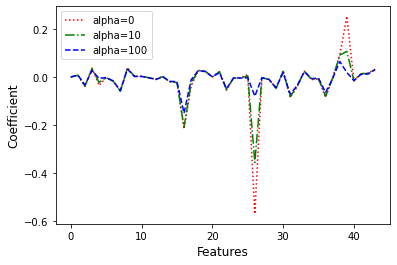

In [143]:
plt.plot(clf1.coef_, label='alpha=0', color='r', linestyle=':')
plt.plot(clf2.coef_, label='alpha=10', color='g', linestyle='-.')
plt.plot(clf3.coef_, label='alpha=100', color='b', linestyle='--')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficient', fontsize=12)
plt.legend();

In [144]:
y_pred = clf1.predict(X_test)

In [145]:
count=0
for t,p in zip(y_test, y_pred):
    print(f"y_test :{t:.1f}  y_pred : {p:.1f}  diff : {t - p :.1f}")
    if t*p > 0: 
        count +=1
    
print(count/ len(y_test))

y_test :-1.0  y_pred : -0.2  diff : -0.8
y_test :2.0  y_pred : 0.0  diff : 2.0
y_test :1.0  y_pred : 0.5  diff : 0.5
y_test :0.0  y_pred : 0.7  diff : -0.7
y_test :0.0  y_pred : -0.1  diff : 0.1
y_test :-2.0  y_pred : -0.7  diff : -1.3
y_test :3.0  y_pred : -0.1  diff : 3.1
y_test :0.0  y_pred : 1.6  diff : -1.6
y_test :-1.0  y_pred : -0.1  diff : -0.9
y_test :-3.0  y_pred : 1.0  diff : -4.0
y_test :2.0  y_pred : 1.0  diff : 1.0
y_test :1.0  y_pred : 0.3  diff : 0.7
y_test :-1.0  y_pred : -0.1  diff : -0.9
y_test :-1.0  y_pred : -0.4  diff : -0.6
y_test :-1.0  y_pred : 0.1  diff : -1.1
y_test :-1.0  y_pred : 0.2  diff : -1.2
y_test :0.0  y_pred : -0.0  diff : 0.0
y_test :-1.0  y_pred : -0.3  diff : -0.7
y_test :-4.0  y_pred : -0.7  diff : -3.3
y_test :-1.0  y_pred : -0.0  diff : -1.0
y_test :-1.0  y_pred : -0.2  diff : -0.8
y_test :-1.0  y_pred : -0.6  diff : -0.4
y_test :2.0  y_pred : 0.6  diff : 1.4
y_test :-2.0  y_pred : 0.2  diff : -2.2
y_test :0.0  y_pred : -0.5  diff : 0.5
y_test

(array([ 1.,  2.,  8., 18., 21., 31., 64., 50., 42., 28., 20., 10.,  6.,
         4.,  0.,  1.]),
 array([-5.14203114, -4.4462576 , -3.75048405, -3.05471051, -2.35893697,
        -1.66316342, -0.96738988, -0.27161634,  0.42415721,  1.11993075,
         1.81570429,  2.51147783,  3.20725138,  3.90302492,  4.59879846,
         5.29457201,  5.99034555]),
 <BarContainer object of 16 artists>)

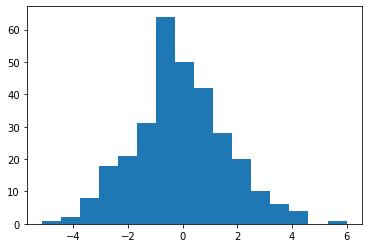

In [146]:
plt.hist(y_test-y_pred, bins=16 )

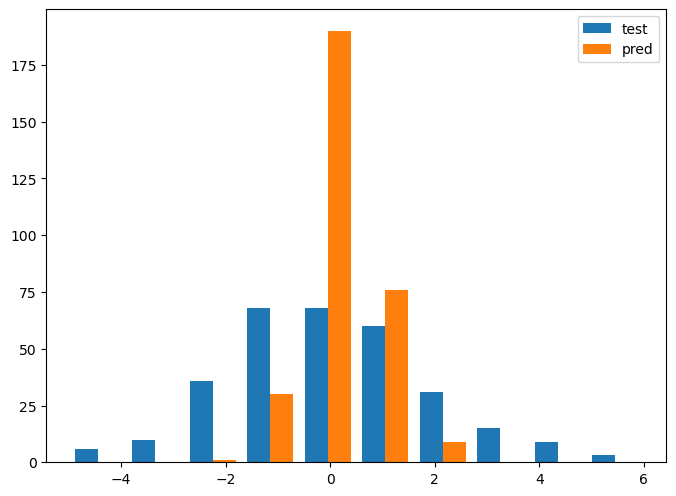

In [147]:
plt.figure(figsize=(8,6),dpi=100)
labels = ['test', 'pred']
plt.hist([y_test, y_pred], stacked=False, label=labels)
plt.legend()

### 線形回帰(LinerRegression)での得点差予測の考察

test(実際)に対して,pred(予測)は少ない点差のゲームを予測してしまう傾向にある｡ 予測で3~6点差のゲームを予測するのはほぼ無理｡
得点差の正負の判断(=勝敗判断)は引き分けを考慮していない状態で約50%と悪くはない､､､｡
分類問題より回帰問題として予測するほうがいいかもしれない､､｡